# Cleaning the test data set

In [28]:
# Import the librairies
import pandas as pd
import matplotlib.pyplot as lt
import seaborn as sns
import numpy as np

In [29]:
test_df=pd.read_csv('test.csv')
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [30]:
test_df.shape

(1459, 80)

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [32]:
# To check the sum of missing values for each features
# Features with lots of missing values will be dropped
# Consider also domain expert knowledge
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

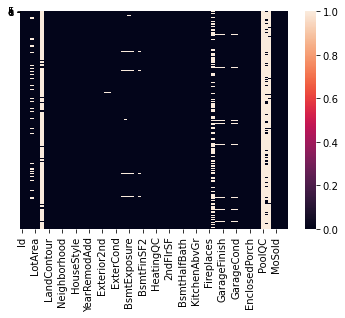

In [33]:
# To check the missing values of the features
# From the heatmap we cn sea that PoolQc, MoSold and other have high missing values
sns.heatmap(test_df.isnull(),yticklabels='False',cbar='False')

In [34]:
# Filling the missing values: Replacng values by their mean or objects by their modes (most frequent categories)
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode([0]))
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode([0]))
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode([0]))
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode([0]))
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode([0]))
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode([0]))
test_df['Electrical']=test_df['Electrical'].fillna(test_df['Electrical'].mode([0]))
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode([0]))
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode([0]))
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode([0]))
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode([0]))

In [35]:
# Dropping some entries: perform for features with at leat 50% null values
test_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)
test_df.shape

(1459, 74)

<AxesSubplot:>

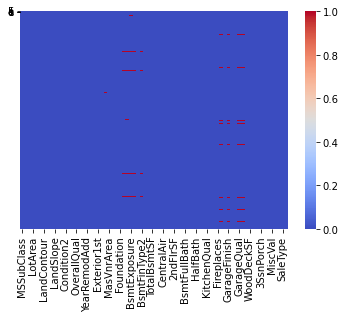

In [36]:
# Observed the clean data
sns.heatmap(test_df.isnull(),yticklabels='False',cbar='False',cmap='coolwarm')

In [37]:
#test_df.dropna(inplace=True)
# test_df.shape

In [38]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [39]:
test_df.shape

(1459, 74)

In [40]:
# Sving the cleaned test data in clentest.csv
test_df.to_csv('cleantest.csv',index=False)